In [282]:
pip install ete3

Note: you may need to restart the kernel to use updated packages.


In [283]:
import matplotlib.pyplot as plt
import networkx as nx
from ete3 import Tree

In [284]:
def read_phylogenetic_tree(path: str) -> list[str]:
    with open(path, "r") as f:
        tree_str = f.read()
    return [x.replace("\n", "") + ";" for x in tree_str.split(";")][:-1]

newick_strings = read_phylogenetic_tree("./newick.tre")
newick_strings[0:3]

['(Atrichantha_elsiae,(Atrichantha_gemmifera,Calotesta_alba,(Metalasia_oligocephala,(Metalasia_bodkinii,(Metalasia_humilis,(Metalasia_quinqueflora,Metalasia_lichtensteinii,((Metalasia_tenuis,Metalasia_tenuifolia),(Metalasia_phillipsii,(((Metalasia_serrata,Metalasia_cymbifolia),Metalasia_seriphiifolia,Metalasia_erubescens),((((Metalasia_serrulata,Metalasia_rogersii),Metalasia_albescens),Metalasia_juniperoides),(Metalasia_rhoderoides,Metalasia_confusa,Metalasia_riparia),(Metalasia_compacta,((((Metalasia_agathosmoides,Metalasia_fastigiata),Metalasia_adunca),Metalasia_capitata),((Metalasia_brevifolia,Metalasia_densa),(Metalasia_muraltiifolia,(Metalasia_pulchella,(Metalasia_cephalotes,(Metalasia_divergens,Metalasia_inversa)))))))))))))))Metalasia));',
 '(Poaceae,(((Apiaceae,Asteraceae),(((Brassicaceae,Fabaceae),Solanaceae),Caprifoliaceae)),(Chenopodiaceae,Polygonaceae)));',
 '(Poaceae,((((Apiaceae,Asteraceae),Caprifoliaceae),((Brassicaceae,Fabaceae),Solanaceae)),(Chenopodiaceae,Polygonaceae

# Newick Strings
### 1. Write a Python script to extract the phylogenetic trees into a graph representation

In [285]:
def parse_newick(s, pos=0, parent=None, G=None):
    
    if G is None:
        G = nx.Graph()
    
    name = ''
    while pos < len(s) and s[pos] not in ['(', ',', ')', ';']:
        name += s[pos]
        pos += 1
        
    current_node = name or str(G.number_of_nodes())
    G.add_node(current_node)
    
    if parent is not None:
        G.add_edge(parent, current_node)
    
    
    if pos < len(s) and s[pos] == '(':
        pos += 1
        while s[pos] != ')':
            pos = parse_newick(s, pos, current_node, G)
            if s[pos] == ',':
                pos += 1
        pos += 1
        
    return pos

def draw_tree(G):
    pos = nx.spring_layout(G, seed=17)
    nx.draw(G, pos, with_labels=True)#, arrows=True)
    plt.show()


(Poaceae,((Apiaceae,Chenopodiaceae),((Brassicaceae,Fabaceae),Caprifoliaceae)));


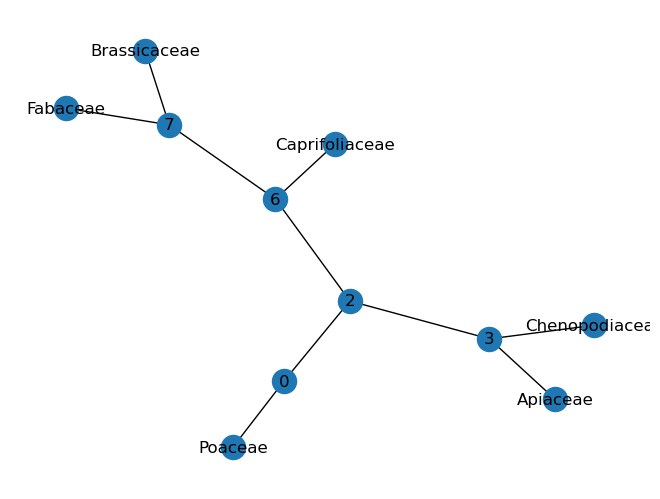

In [286]:
G = nx.Graph()
parse_newick(newick_strings[7], 0, None, G)
print(newick_strings[7])
draw_tree(G)

In [287]:
t = Tree(newick_strings[7])
print(t)


   /-Poaceae
  |
--|      /-Apiaceae
  |   /-|
  |  |   \-Chenopodiaceae
   \-|
     |      /-Brassicaceae
     |   /-|
      \-|   \-Fabaceae
        |
         \-Caprifoliaceae


### The amount of phylogenetic trees:

In [280]:
len(newick_strings)

100

### The amount of rooted trees:

In [277]:
rooted_trees = 0
for tree in newick_strings:
    
    t = Tree(tree, format=8)
    
    for node in t.traverse():
        if len(node.children) <= 2:
            rooted_trees += 1
        break

rooted_trees

93